<a href="https://colab.research.google.com/github/sya203/depression_detection_app/blob/dev/NewDenseNetPneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
# Step 1: Set Up Kaggle API Key
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle/')

# Step 2: Download Dataset from Kaggle
dataset_path = "paultimothymooney/chest-xray-pneumonia"

print("Downloading dataset...")
os.system(f"kaggle datasets download -d {dataset_path} -p ./ --unzip")
print("Dataset downloaded and unzipped!")

Dataset downloaded and unzipped!


In [ ]:
# Step 1: Set Paths and Parameters
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'

# Hyperparameters
IMG_SIZE = (224, 224)  # Image size for DenseNet
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.0001

In [ ]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load pre-trained DenseNet121 model + higher level layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE / 10),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 170s 827ms/step - accuracy: 0.7573 - loss: 0.4955 - val_accuracy: 0.6875 - val_loss: 0.4360
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.4360
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 673ms/step - accuracy: 0.8890 - loss: 0.2675 - val_accuracy: 0.8125 - val_loss: 0.4851
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4851
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 666ms/step - accuracy: 0.9145 - loss: 0.2218 - val_accuracy: 0.6875 - val_loss: 0.3668
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.3668
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 721ms/step - accuracy: 0.9115 - loss: 0.2165 - val_accuracy: 0.7500 - val_loss: 0.4092
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4092
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 733ms/step - accuracy: 0.9

In [ ]:
# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS // 2
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 172s 760ms/step - accuracy: 0.9081 - loss: 0.2259 - val_accuracy: 0.6875 - val_loss: 0.4114
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.4114
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 176s 722ms/step - accuracy: 0.9250 - loss: 0.1947 - val_accuracy: 0.7500 - val_loss: 0.4660
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4660
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 681ms/step - accuracy: 0.9272 - loss: 0.1814 - val_accuracy: 0.7500 - val_loss: 0.4314
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.8320 - loss: 0.3837
Test Accuracy: 88.62%


In [ ]:
from sklearn.metrics import classification_report
# Generate Classification Report
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Save the model
#model.save('densenet_pneumonia_model.h5')

# Save the model in native Keras format
#model.save("densenet_pneumonia_model.keras")
#print("Model saved in Keras format successfully!")

20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 801ms/step
              precision    recall  f1-score   support

      NORMAL       0.90      0.79      0.84       234
   PNEUMONIA       0.88      0.95      0.91       390

    accuracy                           0.89       624
   macro avg       0.89      0.87      0.88       624
weighted avg       0.89      0.89      0.88       624



In [ ]:
from tensorflow.keras.preprocessing import image

def classify_image(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0  # Preprocess the image

  prediction = model.predict(img_array)
  predicted_class = int(prediction[0][0] > 0.5)  # 0 for Normal, 1 for Pneumonia
  confidence = prediction[0][0]

  return predicted_class, confidence

# Example usage
image_path = '/content/chest_xray/test/PNEUMONIA/person101_bacteria_485.jpeg'
predicted_class, confidence = classify_image(image_path)

if predicted_class == 0:
  print(f"The image is classified as Normal with confidence {confidence:.2f}")
else:
  print(f"The image is classified as Pneumonia with confidence {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image is classified as Pneumonia with confidence 0.99


GradCAM implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2

def grad_cam_fixed(model, img_path, layer_name, img_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize to [0, 1]

    # Define a new model to get the feature maps and predictions
    grad_model = Model(inputs=model.input, outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # Focus on the class prediction (binary classification)

    # Compute the gradients of the loss with respect to the feature map
    grads = tape.gradient(loss, conv_outputs)[0]

    # Perform global average pooling on the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Scale the feature maps by the pooled gradients
    conv_outputs = conv_outputs[0]
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Create the heatmap by averaging the feature maps
    heatmap = tf.reduce_mean(conv_outputs, axis=-1).numpy()

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)  # ReLU activation
    heatmap /= np.max(heatmap)  # Normalize to [0, 1]

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    return superimposed_img, predictions[0]

# Example usage
img_path = './chest_xray/test/PNEUMONIA/person109_bacteria_512.jpeg'  # Replace with your image path
layer_name = 'conv5_block16_concat'  # Typical DenseNet layer for Grad-CAM

# Generate heatmap
heatmap_img, prediction = grad_cam_fixed(model, img_path, layer_name)

# Display heatmap
plt.imshow(cv2.cvtColor(heatmap_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Grad-CAM Heatmap (Prediction: {prediction.numpy()[0]:.2f})")
plt.show()

IndexError: tuple index out of range

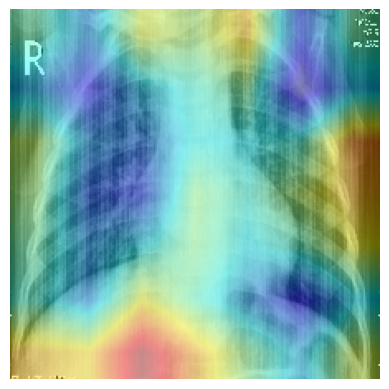

In [ ]:
# Grad-CAM Implementation
def generate_gradcam(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Visualize Grad-CAM
img_path = '/content/chest_xray/test/PNEUMONIA/person1614_virus_2800.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

heatmap = generate_gradcam(model, img_array, 'conv5_block16_concat')

# Superimpose the heatmap on the image
heatmap = cv2.resize(heatmap, (img.size[1], img.size[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.array(img).astype(np.uint8), 0.6, heatmap, 0.4, 0)

plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

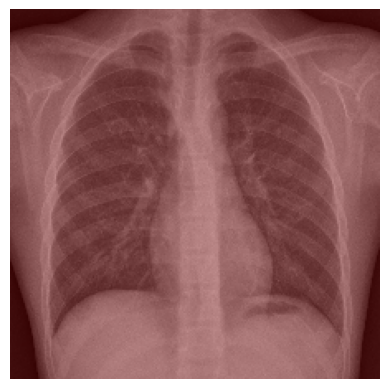

In [ ]:
# Visualize Grad-CAM
img_path = '/content/chest_xray/test/NORMAL/IM-0017-0001.jpeg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

heatmap = generate_gradcam(model, img_array, 'conv5_block16_concat')

# Superimpose the heatmap on the image
heatmap = cv2.resize(heatmap, (img.size[1], img.size[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(np.array(img).astype(np.uint8), 0.6, heatmap, 0.4, 0)

plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

LIME implementation

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ac2c03993844ec8da87c2f8751df4658927957f35adceec015c70ffc4af71988
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

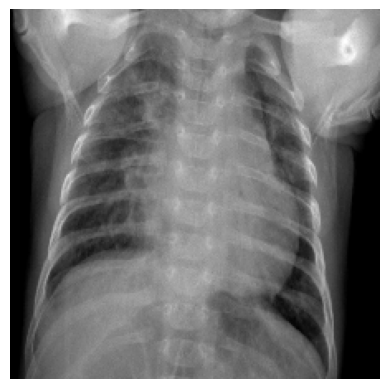

In [ ]:
# Ensure the image is in the correct format for LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=(img_array[0] * 255).astype('double'),  # LIME expects values in [0, 255]
    classifier_fn=lambda x: model.predict(x / 255.0),  # Match the model's input range
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Display LIME explanation
lime_img, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    hide_rest=False,
    num_features=10,
    min_weight=0.01
)

# Scale lime_img back to [0, 1] for matplotlib
lime_img = lime_img / np.max(lime_img)  # Normalize lime_img

plt.imshow(mark_boundaries(lime_img, mask))
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

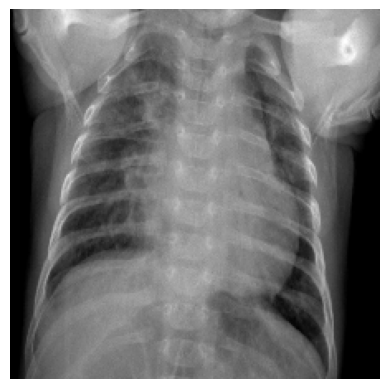

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Ensure the image is in the correct format for LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=(img_array[0] * 255).astype('double'),  # LIME expects values in [0, 255]
    classifier_fn=lambda x: model.predict(x / 255.0),  # Match the model's input range
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Display LIME explanation with red highlights
lime_img, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    hide_rest=False,
    num_features=10,
    min_weight=0.01
)

# Scale lime_img back to [0, 1] for matplotlib
lime_img = lime_img / np.max(lime_img)  # Normalize lime_img

# Create a mask for high-impact regions (positive features)
high_impact_mask = mask > 0  # Identify areas with high impact

# Apply red color to high-impact regions
lime_img[high_impact_mask] = [1, 0, 0]  # Red color (R=1, G=0, B=0)

# Display the image with red highlights
plt.imshow(mark_boundaries(lime_img, mask))
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

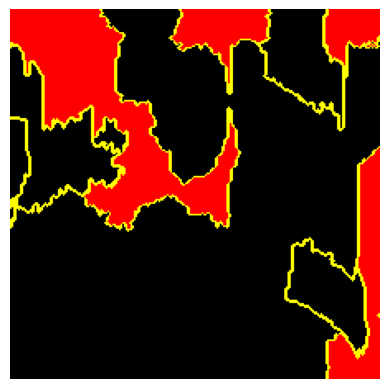

In [ ]:
# LIME Implementation
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image=img_array[0].astype('double'),
    classifier_fn=lambda x: model.predict(x),
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Display LIME explanation with red highlights
#lime_img, mask = explanation.get_image_and_mask(
#    label=explanation.top_labels[0],
#    positive_only=False,
#    hide_rest=False,
#    num_features=10,
#    min_weight=0.01
#)

# Convert LIME output to emphasize high-impact areas with red highlights
#highlighted_lime_img = lime_img.copy()
#highlighted_lime_img[mask > 0] = [255, 0, 0]  # Red highlight for high-impact areas

plt.imshow(mark_boundaries(highlighted_lime_img / 255.0, mask))
plt.axis('off')
plt.show()